<a href="https://colab.research.google.com/github/imdressel/project_gss17/blob/main/GSS_Isabella's_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Comparing marital status and meovrwrk

In [ ]:
! git clone https://github.com/imdressel/project_gss17/

Cloning into 'project_gss17'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 138 (delta 38), reused 24 (delta 22), pack-reused 91
Receiving objects: 100% (138/138), 25.51 MiB | 21.89 MiB/s, done.
Resolving deltas: 100% (84/84), done.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./project_gss17/gss_data_20182022_morevars.csv')
df2018 = df[df['year'] == 2018].copy() # to avoid warnings
df2022 = df[df['year'] == 2022].copy()

# clean variables as needed
meovrwrk = df['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df['meovrwrk'] = meovrwrk
marital = df['marital']
marital = marital.astype("string")
df['marital'] = marital

del marital
del meovrwrk

In [ ]:
# 2018
meovrwrk = df2018['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df2018['meovrwrk'] = meovrwrk
marital = df2018['marital']
marital = marital.astype("string")
df2018['marital'] = marital

del marital
del meovrwrk

In [ ]:
# 2022
meovrwrk = df2022['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
df2022['meovrwrk'] = meovrwrk
marital = df2022['marital']
marital = marital.astype("string")
df2022['marital'] = marital

## Use grouped stacked histplots to look at relationship between marital status and meovrwrk

In [ ]:
df.head()

,year,id,marital,hrs1,conrinc,childs,meovrwrk,hlthdep
0,2018.0,1,never married,NaN,NaN,0.0,agree,NaN
1,2018.0,2,separated,NaN,NaN,3.0,<NA>,NaN
2,2018.0,3,married,40.0,70100.0,2.0,disagree,NaN
3,2018.0,4,married,40.0,84120.0,2.0,neither agree nor disagree,NaN
4,2018.0,5,divorced,NaN,NaN,0.0,<NA>,NaN


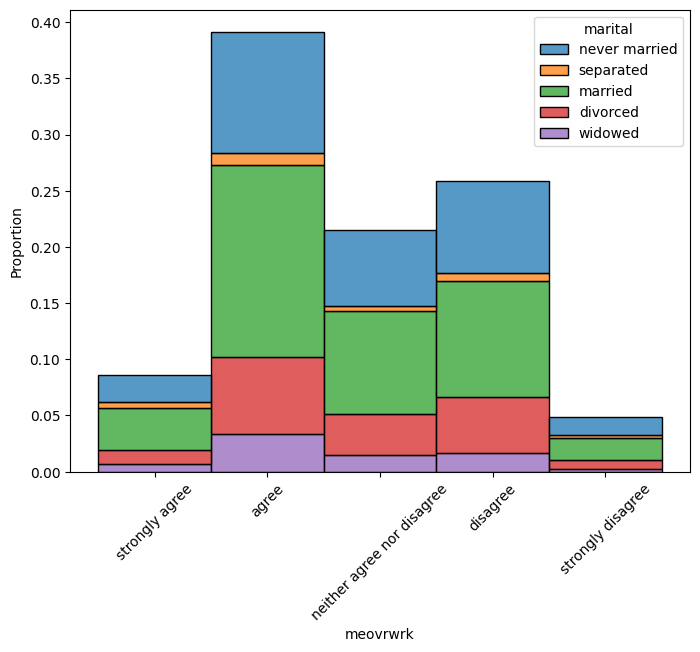

In [ ]:
## create grouped histplot
plt.figure(figsize=(8,6))
df['meovrwrk'] = pd.Categorical(df['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
sns.histplot(data=df,x=df['meovrwrk'],hue=df['marital'],stat='proportion',multiple='stack')
plt.xticks(rotation=45)
plt.title("meovrwrk by marital status")
plt.show()

#### for 2018 only

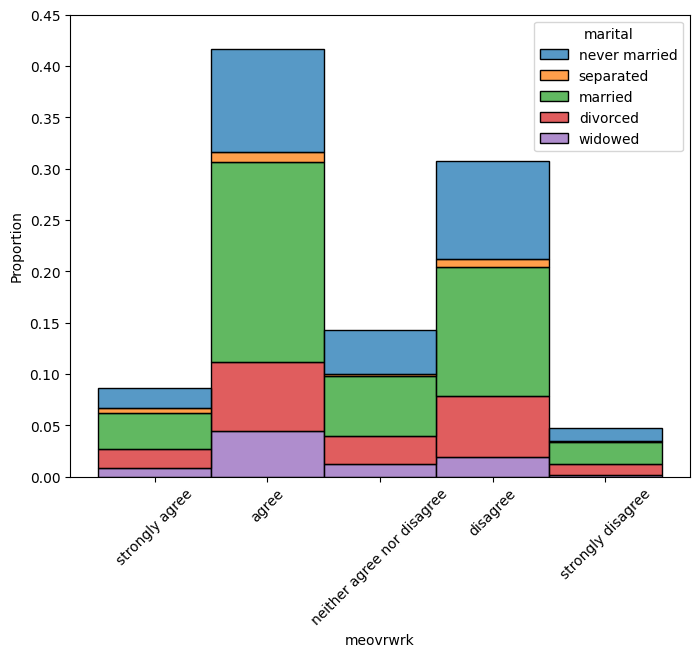

In [ ]:
plt.figure(figsize=(8,6))
horder = ['never married','separated','married','divorced','widowed']
# convert meovrwrk to ordered categorical
df2018['meovrwrk'] = pd.Categorical(df2018['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
sns.histplot(data=df2018,x=df2018['meovrwrk'],hue=df2018['marital'],stat='proportion',multiple='stack',hue_order=horder)
plt.ylim([0, 0.45])
plt.xticks(rotation=45)
plt.show()

#### for 2022 only

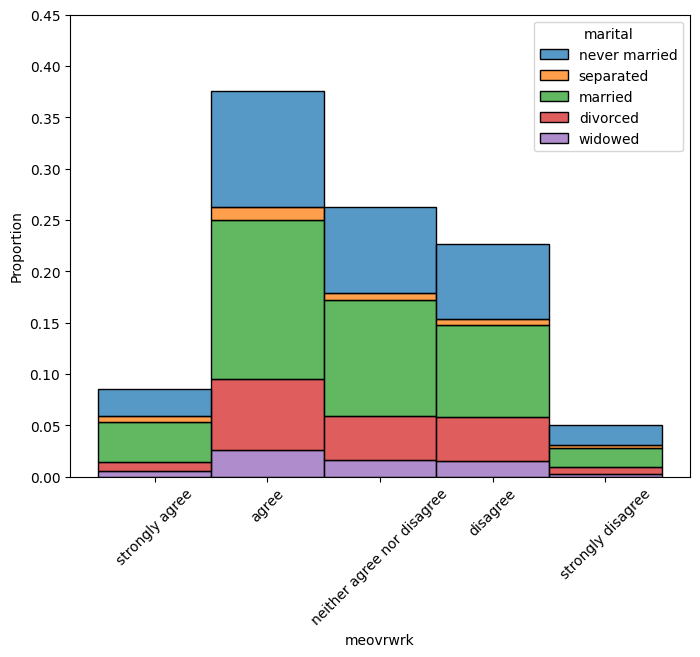

In [ ]:
plt.figure(figsize=(8,6))
df2022['meovrwrk'] = pd.Categorical(df2022['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
sns.histplot(data=df2022,x=df2022['meovrwrk'],hue=df2022['marital'],stat='proportion',multiple='stack',hue_order=horder)
plt.xticks(rotation=45)
plt.ylim([0, 0.45])
plt.show()

### explore married vs separated only and relationship with number of hours worked per week

(0.0, 100.0)

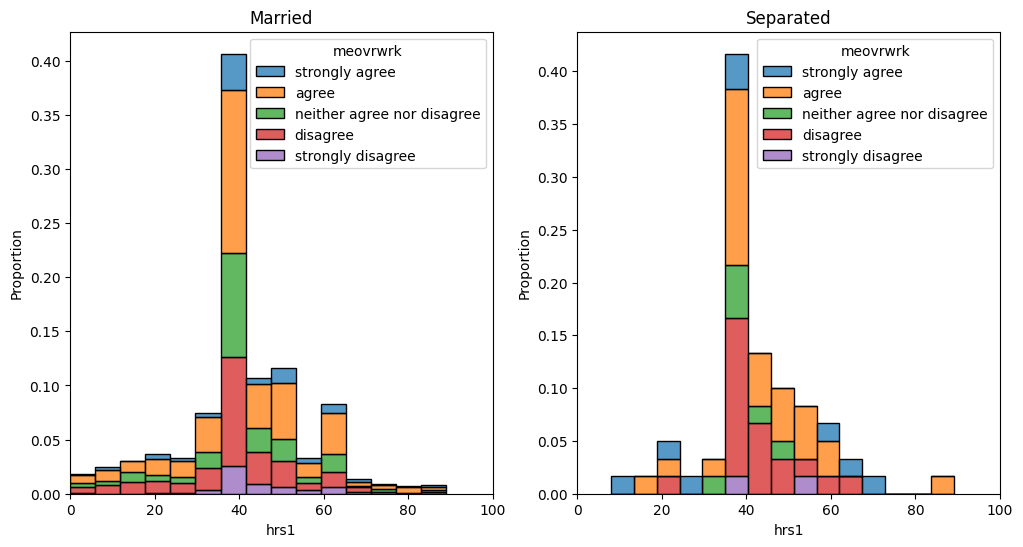

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Married
sns.histplot(data=df_married, x=df_married['hrs1'], hue=df_married['meovrwrk'],
             bins=15, stat='proportion', multiple='stack', ax=axes[0])
axes[0].set_title("Married")
axes[0].set_xlim([0, 100])

# Plot for Separated
sns.histplot(data=df_separated, x=df_separated['hrs1'], hue=df_separated['meovrwrk'],
             bins=15, stat='proportion', multiple='stack', ax=axes[1])
axes[1].set_title("Separated")
axes[1].set_xlim([0, 100])

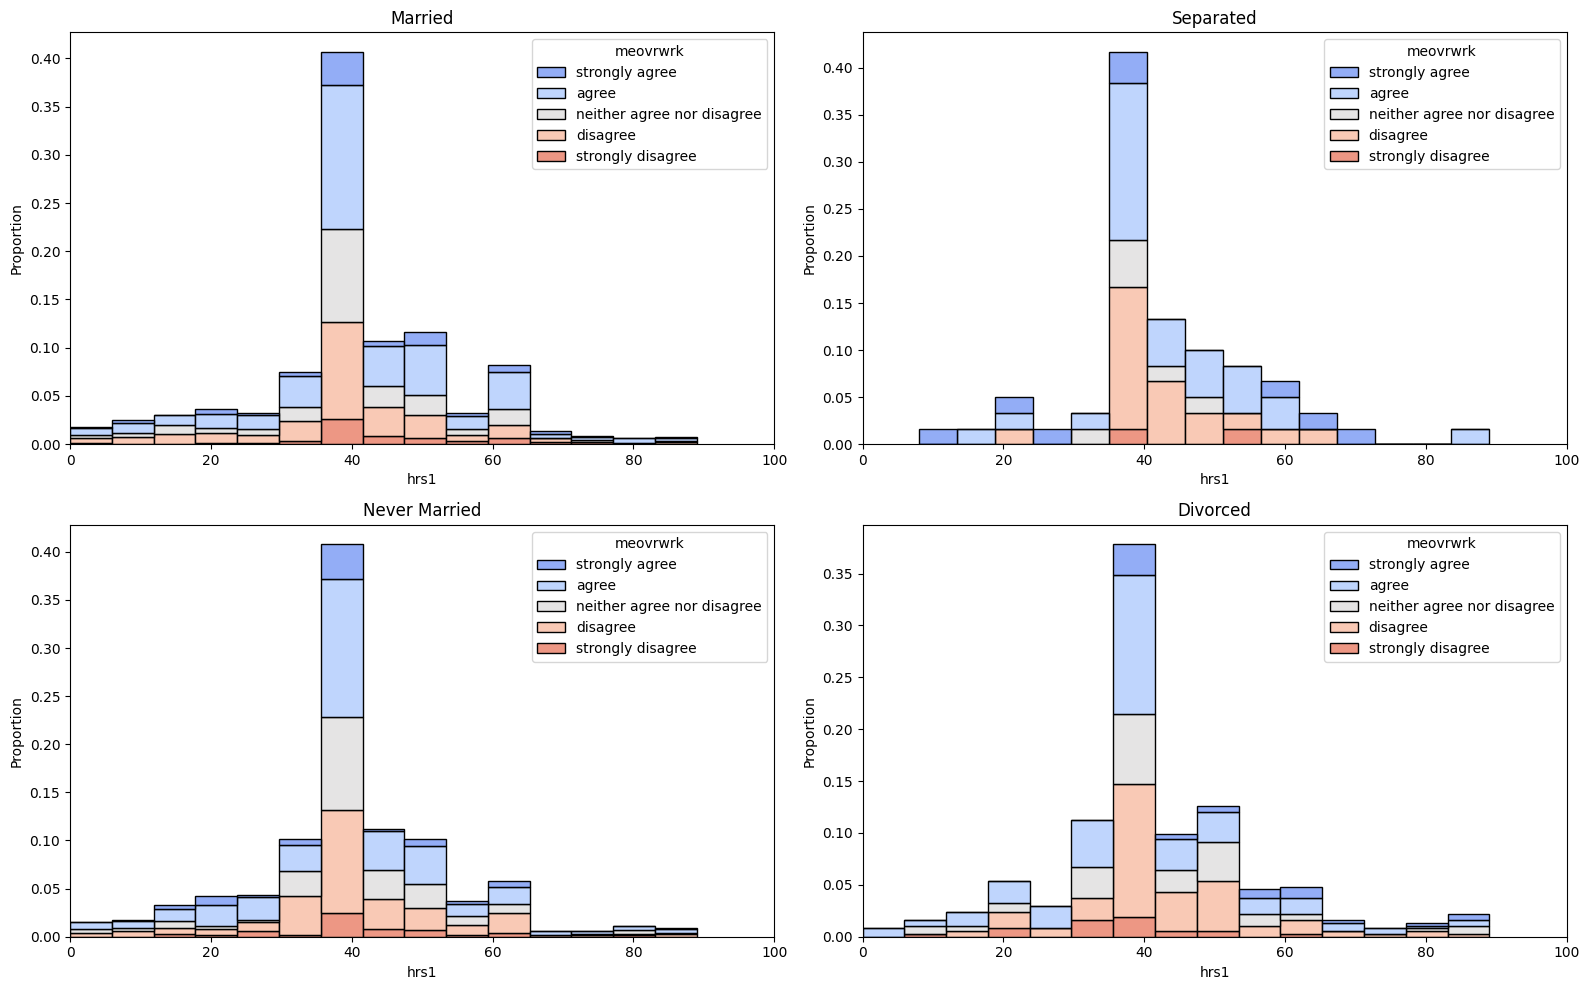

In [98]:
df_married = df[df['marital']=="married"].copy()
df_married['meovrwrk'] = pd.Categorical(df_married['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
df_separated = df[df['marital']=="separated"].copy()
df_separated['meovrwrk'] = pd.Categorical(df_separated['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
df_nevermarried = df[df['marital']=="never married"].copy()
df_nevermarried['meovrwrk'] = pd.Categorical(df_nevermarried['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
df_divorced = df[df['marital']=="divorced"].copy()
df_divorced['meovrwrk'] = pd.Categorical(df_divorced['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)

fig, axes = plt.subplots(2, 2,figsize=(16,10))

sns.histplot(data=df_married, x=df_married['hrs1'], hue=df_married['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[0,0],palette ="coolwarm")
axes[0,0].set_title("Married")
axes[0,0].set_xlim([0, 100])

sns.histplot(data=df_separated, x=df_separated['hrs1'], hue=df_separated['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[0,1],palette ="coolwarm")
axes[0,1].set_title("Separated")
axes[0,1].set_xlim([0, 100])

sns.histplot(data=df_nevermarried, x=df_nevermarried['hrs1'], hue=df_nevermarried['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[1,0],palette ="coolwarm")
axes[1,0].set_title("Never Married")
axes[1,0].set_xlim([0, 100])

sns.histplot(data=df_divorced, x=df_divorced['hrs1'], hue=df_divorced['meovrwrk'], bins=15, stat='proportion', multiple='stack', ax=axes[1,1],palette ="coolwarm")
axes[1,1].set_title("Divorced")
axes[1,1].set_xlim([0, 100])

plt.tight_layout()
plt.show()


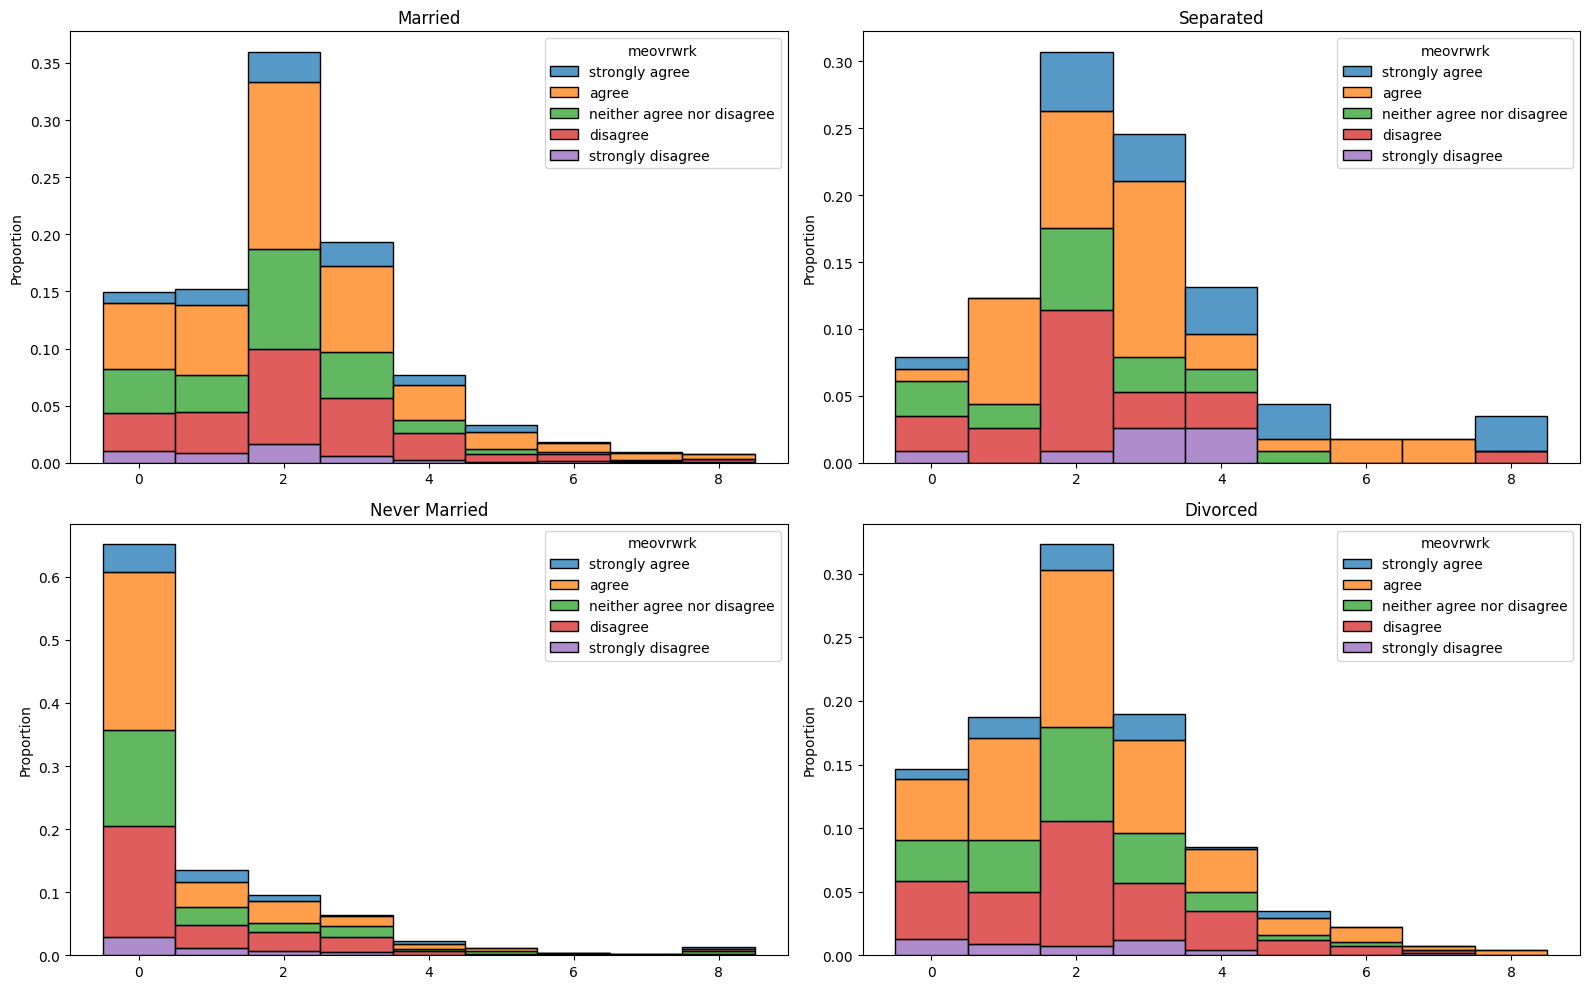

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(16,10))

sns.histplot(data=df_married, x=pd.Categorical(df_married['childs']), hue=df_married['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,0])
axes[0,0].set_title("Married")
# axes[0,0].set_xlim([0, 10])

sns.histplot(data=df_separated, x=pd.Categorical(df_separated['childs']), hue=df_separated['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,1])
axes[0,1].set_title("Separated")
# axes[0,1].set_xlim([0, 10])

sns.histplot(data=df_nevermarried, x=pd.Categorical(df_nevermarried['childs']), hue=df_nevermarried['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,0])
axes[1,0].set_title("Never Married")
# axes[1,0].set_xlim([0, 10])

sns.histplot(data=df_divorced, x=pd.Categorical(df_divorced['childs']), hue=df_divorced['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,1])
axes[1,1].set_title("Divorced")
# axes[1,1].set_xlim([0, 10])

plt.tight_layout()
plt.show()

Compare relationship by sex

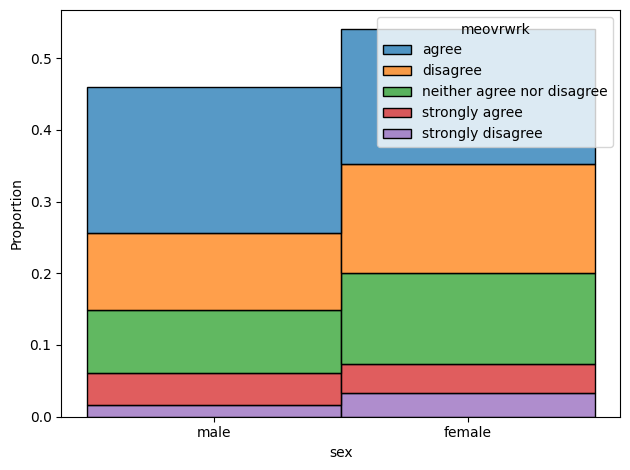

In [ ]:
sns.histplot(data=df, x=df['sex'], hue=df['meovrwrk'],
              stat='proportion', multiple='stack')
plt.tight_layout()

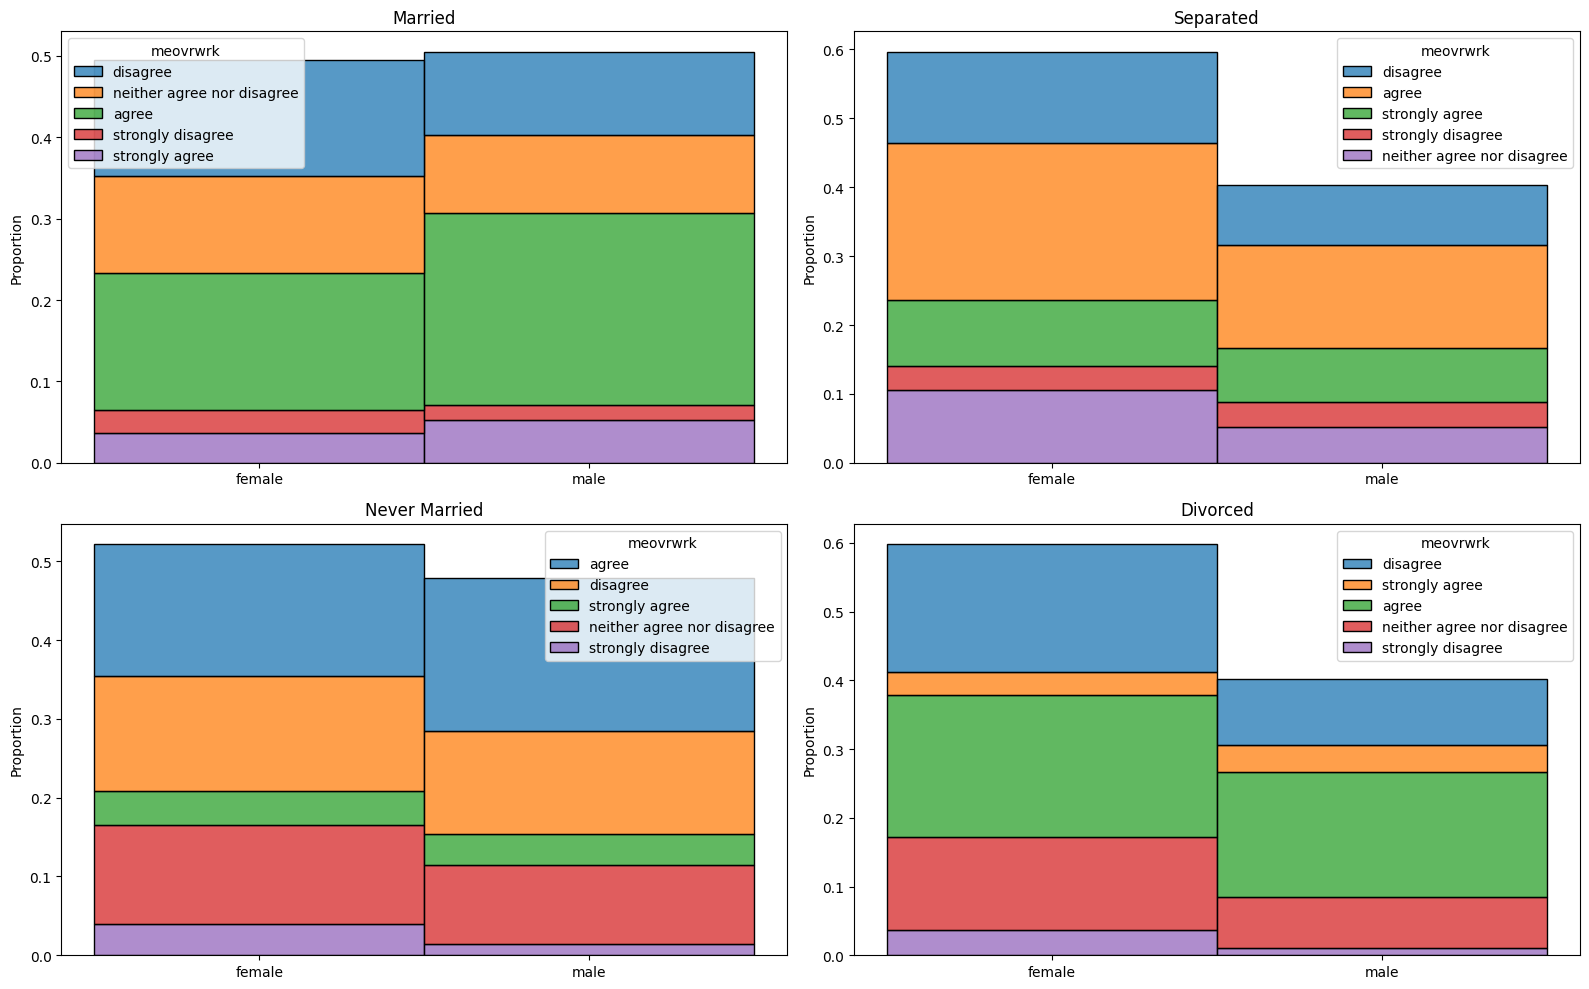

In [ ]:
fig, axes = plt.subplots(2, 2,figsize=(16,10))

sns.histplot(data=df_married, x=pd.Categorical(df_married['sex']), hue=df_married['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,0])
axes[0,0].set_title("Married")
# axes[0,0].set_xlim([0, 10])

sns.histplot(data=df_separated, x=pd.Categorical(df_separated['sex']), hue=df_separated['meovrwrk'], stat='proportion', multiple='stack', ax=axes[0,1])
axes[0,1].set_title("Separated")
# axes[0,1].set_xlim([0, 10])

sns.histplot(data=df_nevermarried, x=pd.Categorical(df_nevermarried['sex']), hue=df_nevermarried['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,0])
axes[1,0].set_title("Never Married")
# axes[1,0].set_xlim([0, 10])

sns.histplot(data=df_divorced, x=pd.Categorical(df_divorced['sex']), hue=df_divorced['meovrwrk'], stat='proportion', multiple='stack', ax=axes[1,1])
axes[1,1].set_title("Divorced")
# axes[1,1].set_xlim([0, 10])

plt.tight_layout()
plt.show()

#### explore relationship between meovrwrk and working hours

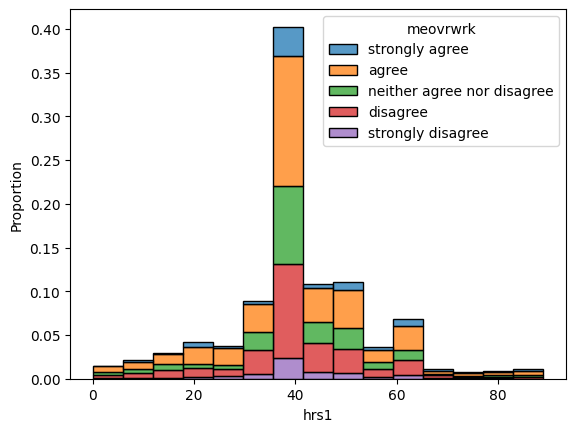

In [ ]:
sns.histplot(data=df,x=df['hrs1'],hue=df['meovrwrk'],bins=15,stat='proportion',multiple='stack')
plt.show()

In [ ]:
mean_hrs = df.groupby('meovrwrk')['hrs1'].mean()
mean_hrs

meovrwrk
strongly agree                43.413978
agree                         40.563446
neither agree nor disagree    40.788462
disagree                      40.334448
strongly disagree             41.530769
Name: hrs1, dtype: float64

### Explore relationship with the number of children

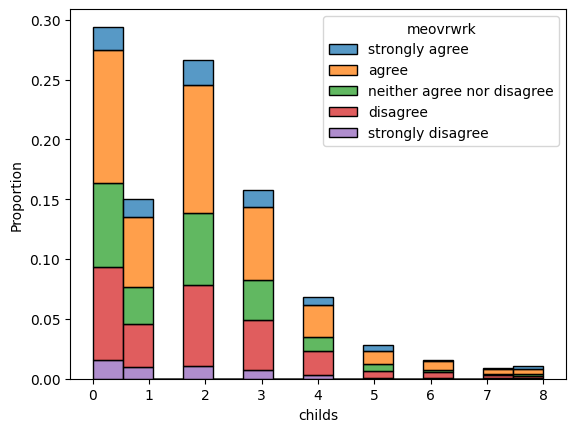

In [ ]:
sns.histplot(data=df,x=df['childs'],hue=df['meovrwrk'],bins=15,stat='proportion',multiple='stack')
plt.show()

#### Conclusions

Across all years:
*   The largest category across all survey respondents is "agree". The second largest category is "disagree". More survey respondents agree that family life suffers because men overwork than disagree. This is likely because women typically play a larger role
*   List item


### Create crosstabs for the different years

In [ ]:
# all years
pd.crosstab(df['marital'],df['meovrwrk'],margins=True,normalize=True)

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree,All
marital,,,,,,
divorced,0.012583,0.068824,0.036723,0.049563,0.008218,0.175912
married,0.037494,0.170776,0.091423,0.103493,0.019774,0.422958
never married,0.024140,0.107858,0.067540,0.082435,0.016436,0.298408
separated,0.005136,0.011043,0.004622,0.006677,0.002054,0.029533
widowed,0.006677,0.033128,0.014381,0.016692,0.002311,0.073190
All,0.086030,0.391628,0.214689,0.258860,0.048793,1.000000


In [ ]:
# 2018
pd.crosstab(df2018['marital'],df2018['meovrwrk'],margins=True,normalize=True)

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree,All
marital,,,,,,
divorced,0.018123,0.067961,0.027184,0.058900,0.010356,0.182524
married,0.035599,0.194822,0.058252,0.125566,0.021359,0.435599
never married,0.020065,0.099676,0.042718,0.095793,0.012298,0.270550
separated,0.004531,0.009709,0.001942,0.007767,0.001294,0.025243
widowed,0.008414,0.044013,0.012298,0.019417,0.001942,0.086084
All,0.086731,0.416181,0.142395,0.307443,0.047249,1.000000


In [ ]:
# 2022
pd.crosstab(df2022['marital'],df2022['meovrwrk'],margins=True,normalize=True)

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree,All
marital,,,,,,
divorced,0.008940,0.069391,0.042997,0.043423,0.006811,0.171562
married,0.038740,0.154960,0.113240,0.088974,0.018731,0.414645
never married,0.026820,0.113240,0.083865,0.073648,0.019157,0.316731
separated,0.005534,0.011920,0.006386,0.005960,0.002554,0.032354
widowed,0.005534,0.025968,0.015751,0.014900,0.002554,0.064708
All,0.085568,0.375479,0.262239,0.226905,0.049808,1.000000
